### Decision Tree

Problem Statement:
    
Build A Decision Tree on the Following Dataset

Dataset-->Titanic.csv

Class Variable : 0-->Not_Survived, 1-->Survived

In [1]:
#Importing the Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#Loading The Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/Titanic.csv")
Dataset.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


Inference: As all the Variable i.e X & Y are Categorial, will Use Get dummies on X and Label Encoder on Y

In [3]:
#Changes does not effect the "data" dataframe
Dataset1 = Dataset.copy()

In [4]:
#Get Dummies -- One Hot Encoding
Final_df = pd.get_dummies(Dataset1.iloc[:,0:3])

In [5]:
#Complete Iris dataset - applying lable encoder to species column
label_encoder = preprocessing.LabelEncoder()
Final_df['Survived'] = label_encoder.fit_transform(Dataset1['Survived']) 
Final_df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived
0,0,0,1,0,0,1,0,1,0
1,0,0,1,0,0,1,0,1,0
2,0,0,1,0,0,1,0,1,0
3,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,1,0,1,0


In [6]:
# seprating x and y(class) variables 
x= Final_df.iloc[:,0:8]
y= Final_df['Survived']

In [7]:
x.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child
0,0,0,1,0,0,1,0,1
1,0,0,1,0,0,1,0,1
2,0,0,1,0,0,1,0,1
3,0,0,1,0,0,1,0,1
4,0,0,1,0,0,1,0,1


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Survived, dtype: int32

Inferences: Now the X & Y variables are splitted from the Dataset

In [9]:
# to check unique values in specified column
Final_df['Survived'].unique()

array([0, 1])

In [10]:
# to count total values for distinct/unique value
Final_df.Survived.value_counts()

0    1490
1     711
Name: Survived, dtype: int64

Inference: This is a InBalanced Dataset.

When the Observation/Values are Equally Distributed along the all the Classes then it called Balanced Dataset.when They are not Equally Distributed then it is Called Inbalance Dataset 

In [11]:
# to list name of columns
colnames = list(Final_df.columns)
colnames

['Class_1st',
 'Class_2nd',
 'Class_3rd',
 'Class_Crew',
 'Gender_Female',
 'Gender_Male',
 'Age_Adult',
 'Age_Child',
 'Survived']

In [12]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Inference: Made a Train-Test Split of 80% - 20%

In [13]:
x_train

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child
722,0,0,0,1,0,1,1,0
951,0,0,0,1,0,1,1,0
608,0,0,1,0,0,1,1,0
2056,0,1,0,0,1,0,1,0
390,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...
2103,0,1,0,0,1,0,1,0
626,0,0,1,0,0,1,1,0
1863,0,0,0,1,0,1,1,0
1330,0,0,0,1,0,1,1,0


In [14]:
y_train

722     0
951     0
608     0
2056    1
390     0
       ..
2103    1
626     0
1863    1
1330    0
2055    1
Name: Survived, Length: 1760, dtype: int32

#### Building Decision Tree Classifier using Entropy Criteria -- C5.0

In [15]:
#applying DT classifier with criteria and depth on train models
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Inference: Model is Fitted, The Decision Tree is of C5.0 Technique, Pruning is Set using the Hyperparameter of max_depth = 3, while means only Three Split/Node will be there.

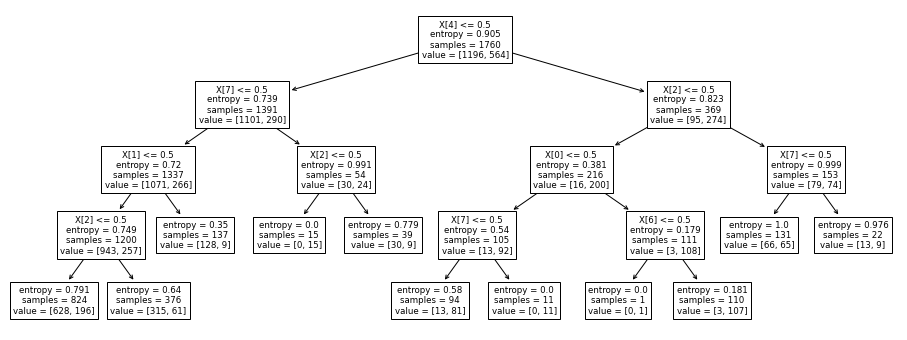

In [16]:
#PLot the decision tree
plt.figure(figsize=(16,6))
tree.plot_tree(model);

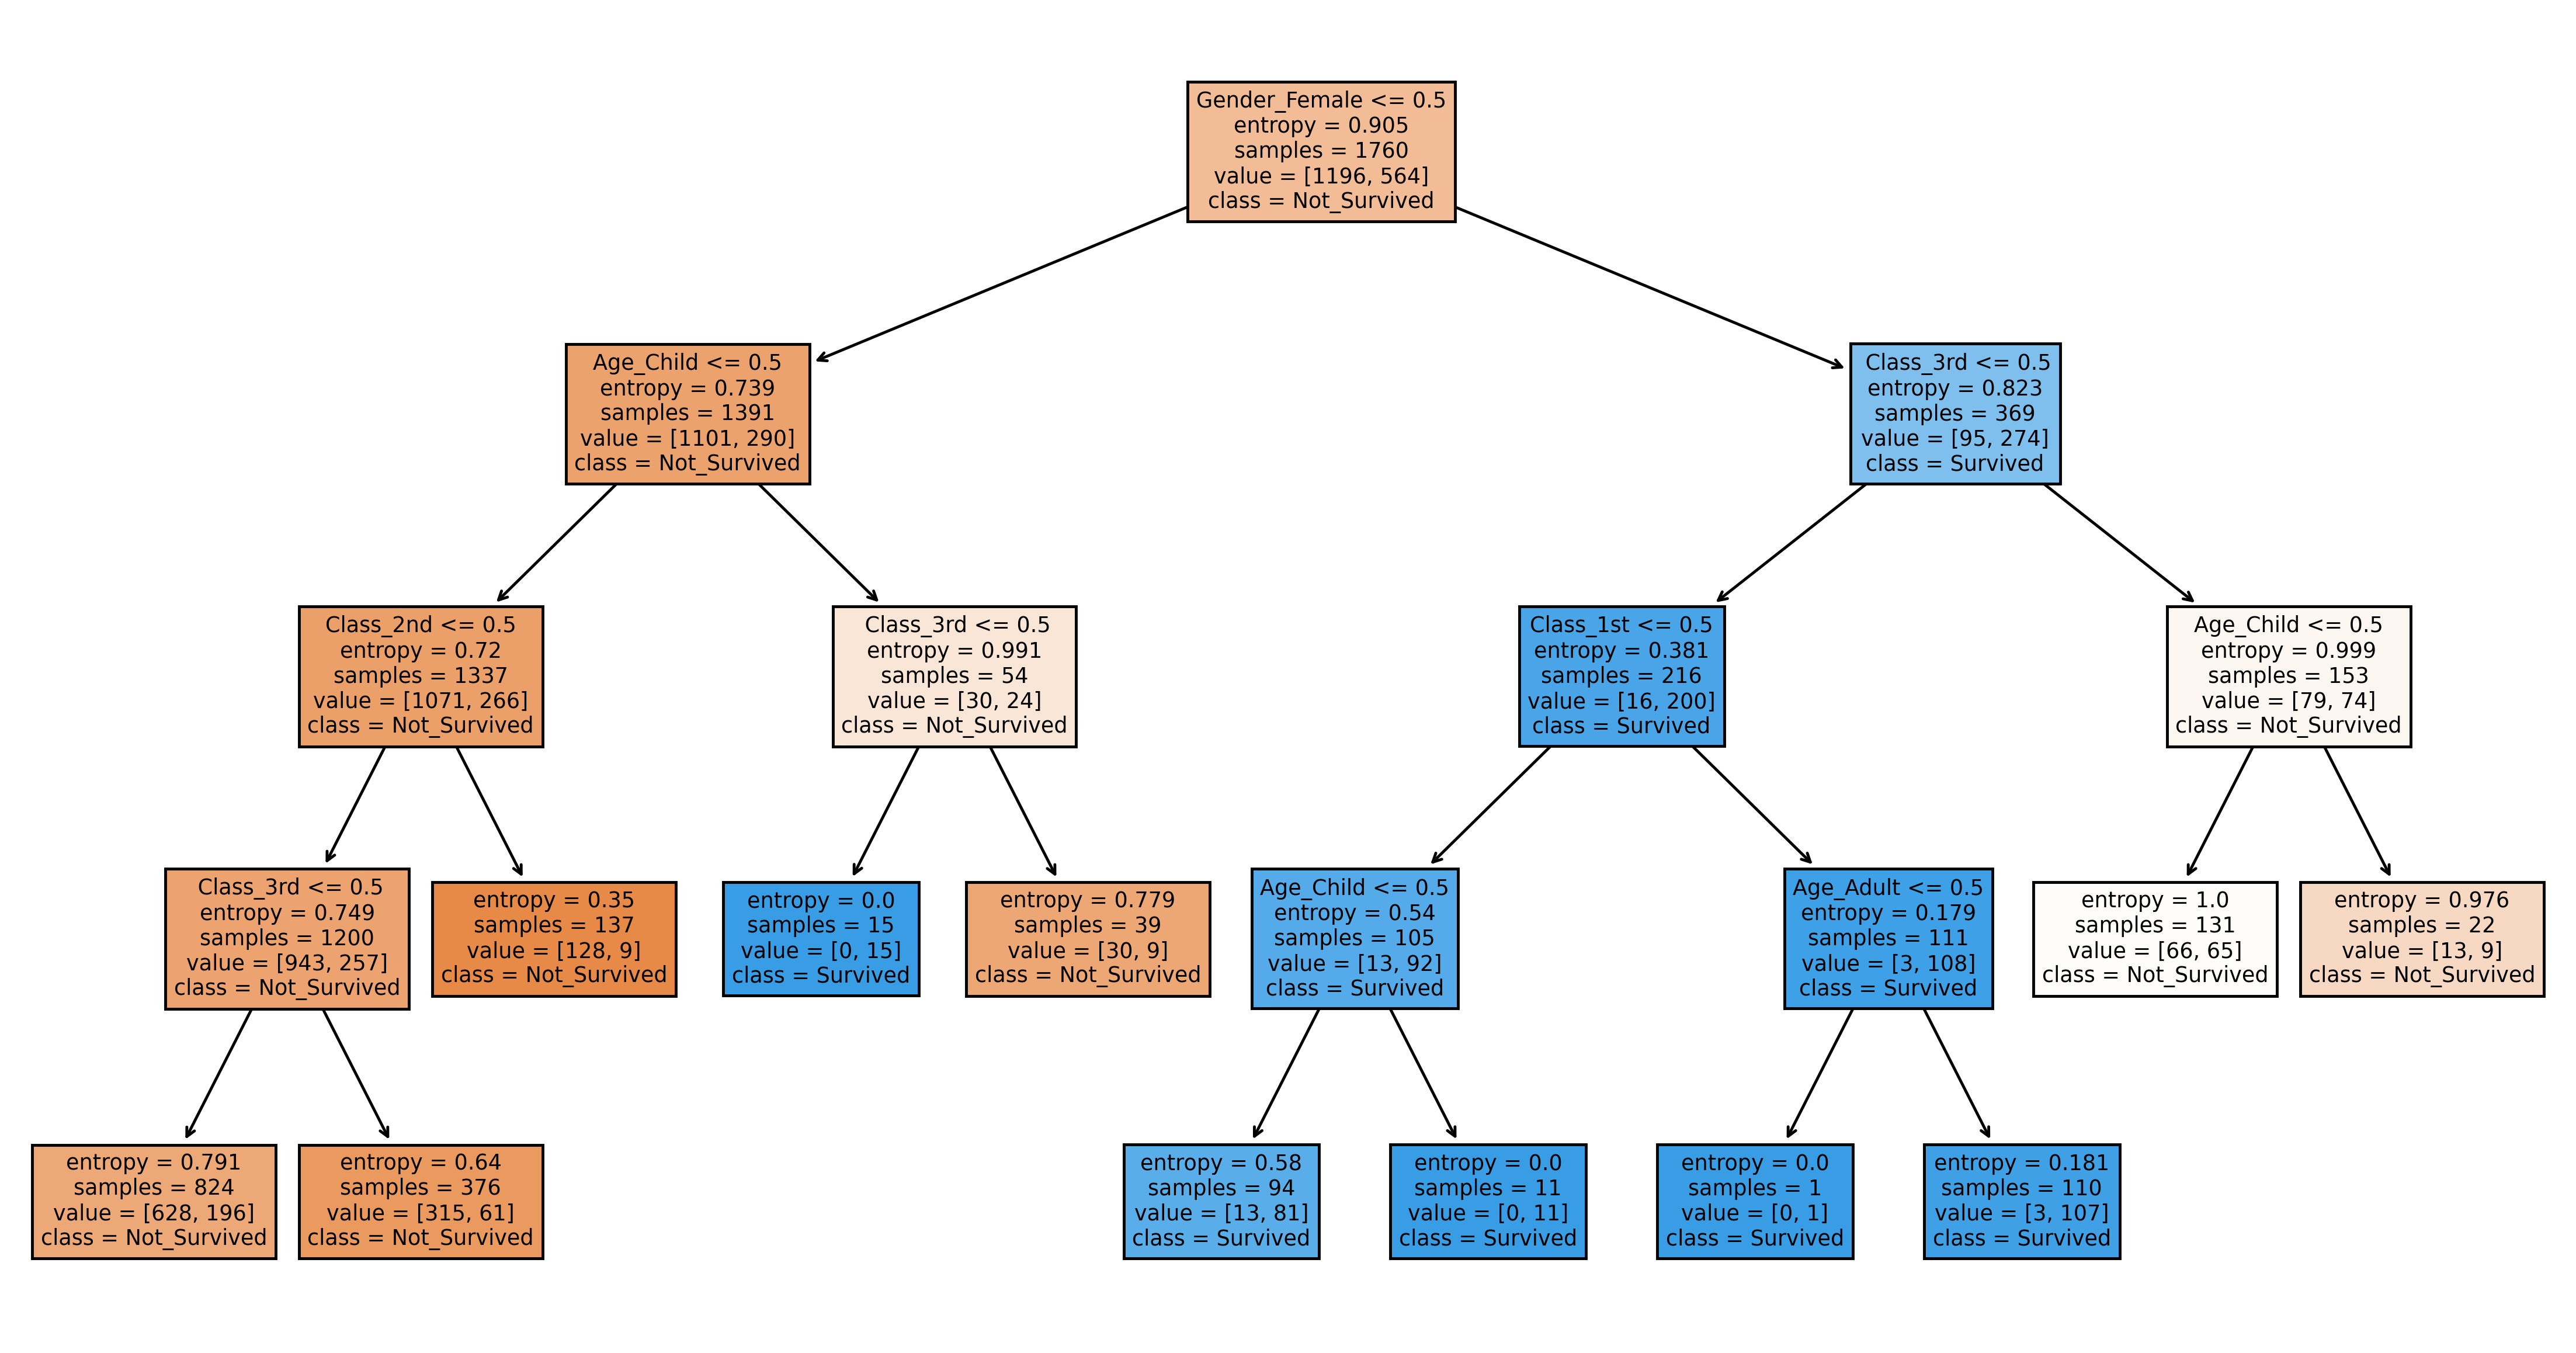

In [17]:
#A Fancy Decision Tree
fn=['Class_1st', 'Class_2nd',' Class_3rd','Class_Crew','Gender_Female','Gender_Male','Age_Adult','Age_Child']
cn=['Not_Survived','Survived']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,8.5), dpi=350)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [18]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.DataFrame(preds).value_counts() # getting the count of each category 

0    382
1     59
dtype: int64

In [19]:
#The preds value for each datapoint in the Test Dataset 
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [20]:
#Getting the 2 way table to understand the correct and wrong predictions -- Confusion Matrix
pd.crosstab(y_test,preds)

col_0,0,1
Survived,,
0,290,4
1,92,55


In [21]:
#Accuracy 
np.mean(preds==y_test)

0.782312925170068

#### Building Decision Tree Classifier (CART) using Gini Criteria

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [23]:
#Fitting the Model on Train Dataset
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

Inference: Model is Fitted, The Decision Tree is of CART Technique, Pruning is Set using the Hyperparameter of max_depth = 3, while means only Three Split/Node will be there.

In [24]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.DataFrame(preds).value_counts() # getting the count of each category 

0    382
1     59
dtype: int64

In [25]:
#Accuracy 
np.mean(preds==y_test)

0.782312925170068

Inference: The Final Accuracy of the is 0.78 which is Came Same as per C5.0 too 